---

<center><h1> Assignment 4 : SVM vs KNN </h1></center>

---

<center><h2> NAME : <i> Soumyadeep Choudhury </i></h2></center>
<center><h2> NET_id : <i> sxc180056 </i></h2></center>
<center><h2> UTD_id : <i> 2021439916 </i></h2></center>


# 1. <font color='#556b2f'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [64]:
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(30)  # Deliberately use a different seed
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [65]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

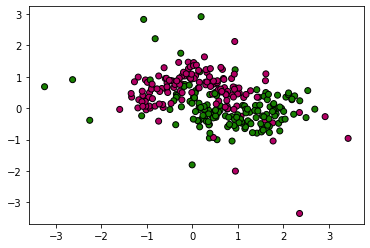

In [66]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

Best Regularization Parameters : C :  [10.0, 1000.0]


Regularization Parameter : C = 10
Testing Error :  0.21666666666666667
Accuracy :  78.33333333333333


Regularization Parameter : C = 1000
Testing Error :  0.15000000000000002
Accuracy :  85.0


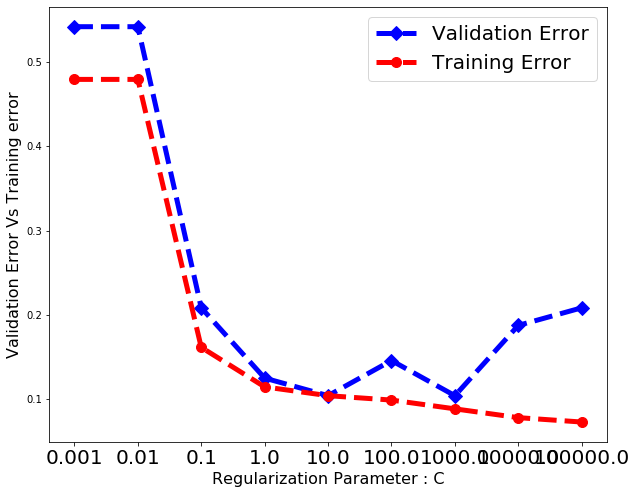

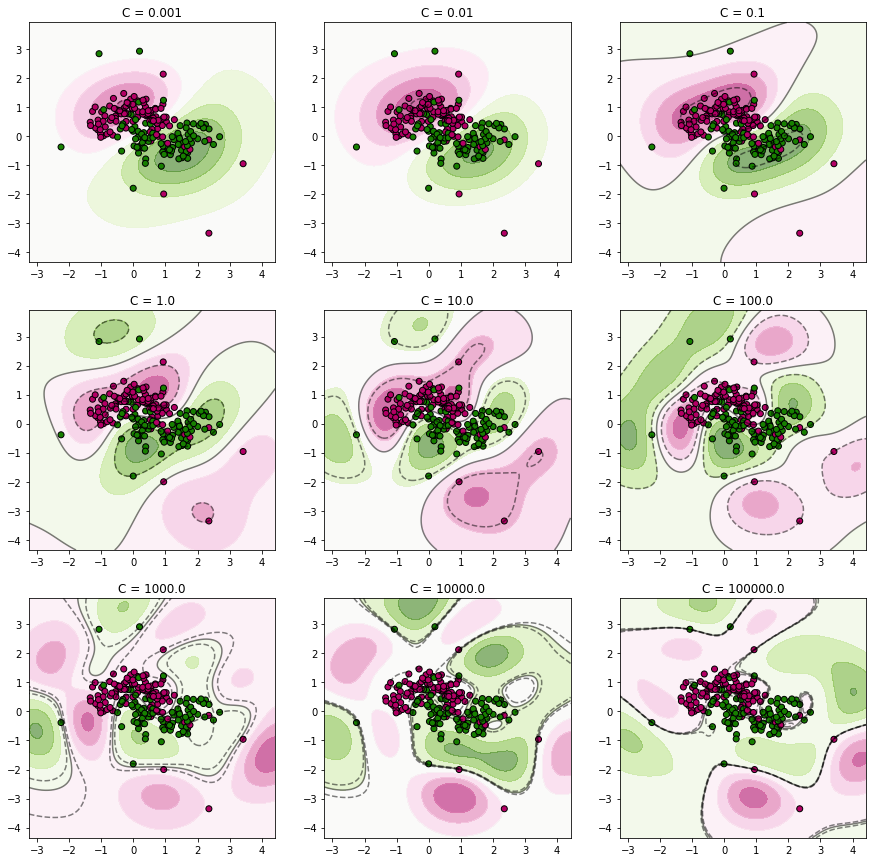

In [67]:
# Learn support vector clfs with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C

################# My code #####################

'''
Reference from : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
'''
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

#########

C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()

#############

C_values_list_struct = list(C_values)
Better_reg_param = []
Decrease_err = 1
count = 1

##### SVM training ####

for ind, key in enumerate(C_values):
    cmf = SVC(C = key, gamma = 'auto', kernel='rbf', verbose=False, shrinking=True, random_state=0)
    cmf.fit(X_trn, y_trn)
    models[key] = cmf
    pred_y_res = cmf.predict(X_trn)
    pred_y_val = cmf.predict(X_val)
    tmp1 = accuracy_score(y_trn,pred_y_res)
    tmp2 = accuracy_score(y_val,pred_y_val)
    trnErr[ind] = 1 - tmp1
    valErr[ind] = 1 - tmp2

##### Visulaize #####

plt.figure(figsize = (10,8))
plt.plot(list(valErr.keys()), list(valErr.values()), marker='D', linestyle='dashed', linewidth=5, markersize=10, color='b')
plt.plot(list(trnErr.keys()), list(trnErr.values()), marker='o', linestyle='dashed', linewidth=5, markersize=10, color='r')

plt.ylabel('Validation Error Vs Training error', fontsize = 16)
plt.xlabel('Regularization Parameter : C', fontsize = 16)
plt.xticks(list(trnErr.keys()), ('0.001', '0.01', '0.1', '1.0', '10.0','100.0','1000.0','10000.0','100000.0'),fontsize=20)
plt.legend(['Validation Error', 'Training Error'], fontsize=20)

visualize(models, 'C', X_trn, y_trn)

############## Calculating Best Regularization parameter ############

for each_err in valErr:
    if(valErr[each_err] < Decrease_err):
        Decrease_err = valErr[each_err]
        Better_reg_param.clear()
        Better_reg_param.append(C_values_list_struct[each_err])
        
    elif (valErr[each_err] == Decrease_err):
        count = count + 1
        Better_reg_param.append(C_values_list_struct[each_err])

print('Best Regularization Parameters : C : ', Better_reg_param)

#### c = 10 ###
print('\n')
print('Regularization Parameter : C = 10')
cmf_1 = SVC(C = 10, gamma='auto', kernel='rbf', verbose=False, shrinking=True, random_state=0)
cmf_1.fit(X_trn, y_trn)
tst_pred_y = cmf_1.predict(X_tst)
temp_1 = accuracy_score(y_tst,tst_pred_y)
testErr = 1 - temp_1
print('Testing Error : ',testErr)
acc_1 = accuracy_score(y_tst,tst_pred_y) * 100
print('Accuracy : ',acc_1)

### c = 1000 ###
print('\n')
print('Regularization Parameter : C = 1000')
cmf_2 = SVC(C = 1000, gamma='auto', kernel='rbf', verbose=False, shrinking=True, random_state=0)
cmf_2.fit(X_trn, y_trn)
tst_pred_y = cmf_2.predict(X_tst)
temp_2 = accuracy_score(y_tst,tst_pred_y)
testErr = 1 - temp_2
print('Testing Error : ',testErr)
acc_2 = accuracy_score(y_tst,tst_pred_y) * 100
print('Accuracy : ',acc_2)

######################################################

# My observation:

On expanding the estimation of the regularization boundary, the preparation mistake diminishes. This regularization is finished by changing the estimation of C. For little C esteem, an enormous edge is considered as a choice limit and for huge C esteem, a more modest edge is thought of. Yet, picking a high C worth can prompt overfitting as misclassification increments. I have picked two C esteems as "10" and "1000". In the wake of testing on the two of them, I found that accepting the regularization boundary as 1000 gives the best exactness score.

---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

Best Regularization Parameters : Gamma :  [1.0, 10.0]


Regularization Parameter : gamma = 1
Accuracy :  83.33333333333334


Regularization Parameter : gamma = 10
Accuracy :  83.33333333333334


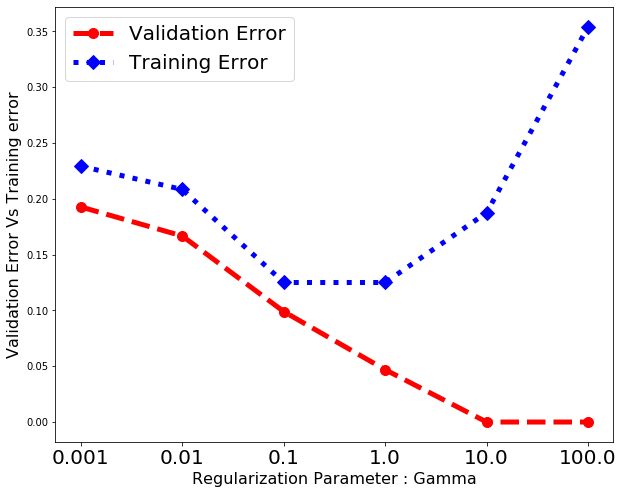

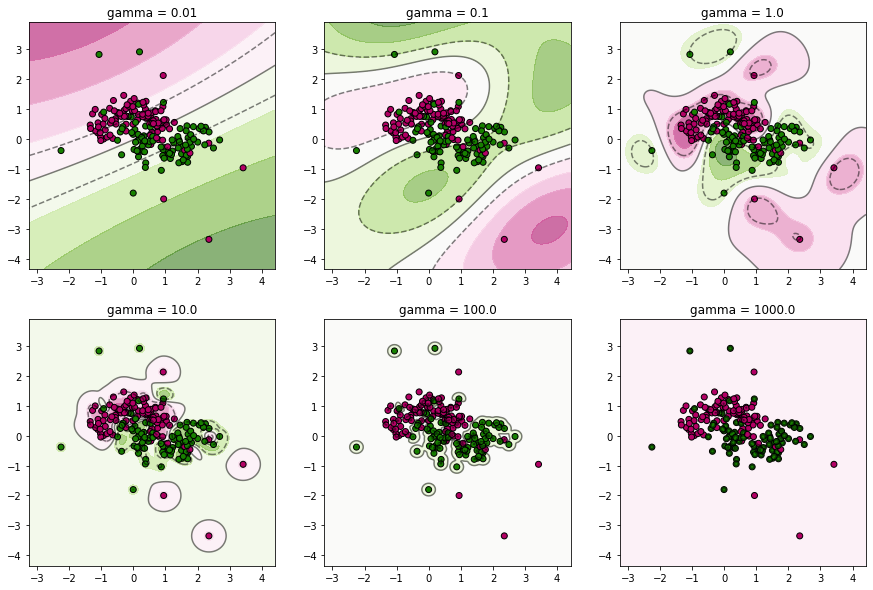

In [68]:
# Learn support vector clfs with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict()
trnErr = dict()
valErr = dict()

#############

gamma_values_list_struct =list(gamma_values)
Better_reg_param = []
Decrease_err = 1
count = 1

#### SVM gamma train ###

for ind, key in enumerate(gamma_values):
    cmf = SVC(C = 10, gamma = key, kernel='rbf', verbose=False, shrinking=True, random_state=0)
    cmf.fit(X_trn, y_trn)
    models[key] = cmf
    pred_y_res = cmf.predict(X_trn)
    pred_y_val = cmf.predict(X_val)
    tmp1 = accuracy_score(y_trn, pred_y_res)
    tmp2 = accuracy_score(y_val, pred_y_val)
    trnErr[ind] = 1 - tmp1
    valErr[ind] = 1 - tmp2

plt.figure(figsize=(10,8))
plt.plot(list(trnErr.keys()), list(trnErr.values()), marker='o', linestyle='dashed', linewidth=5, markersize=10, color='r')
plt.plot(list(valErr.keys()), list(valErr.values()), marker='D', linestyle='dotted', linewidth=5, markersize=10, color='b')

plt.ylabel('Validation Error Vs Training error', fontsize = 16)
plt.xlabel('Regularization Parameter : Gamma', fontsize = 16)
plt.xticks(list(trnErr.keys()), ( '0.001', '0.01', '0.1', '1.0', '10.0','100.0','1000.0','10000.0','100000.0'),fontsize=20)
plt.legend(['Validation Error', 'Training Error'], fontsize=20)

visualize(models,'gamma', X_trn, y_trn)

###################################

for each_err in valErr:
    if(valErr[each_err] < Decrease_err ):
        Decrease_err = valErr[each_err]
        Better_reg_param.clear()
        Better_reg_param.append(gamma_values_list_struct[each_err])
    elif (valErr[each_err] == Decrease_err ):
        count = count + 1
        Better_reg_param.append(gamma_values_list_struct[each_err])
        

print('Best Regularization Parameters : Gamma : ', Better_reg_param)

### gamma = 1 ##
print('\n')
print('Regularization Parameter : gamma = 1')
cmf_1 = SVC(C = 10, gamma=1.0, kernel='rbf')
cmf_1.fit(X_trn, y_trn)
tst_pred_y = cmf_1.predict(X_tst)
acc_1 = accuracy_score(y_tst,tst_pred_y) * 100
print('Accuracy : ', acc_1)

### gamma = 10 ##
print('\n')
print('Regularization Parameter : gamma = 10')
cmf_2 = SVC(C = 10, gamma=10.0, kernel='rbf')
cmf_2.fit(X_trn, y_trn)
tst_pred_y = cmf_2.predict(X_tst)
acc_2 = accuracy_score(y_tst,tst_pred_y) * 100
print('Accuracy : ', acc_2)

######################################################

# My observation:

Training error diminishes with high estimations of gamma. gamma is a boundary of the RBF bit and can be considered as the 'spread' of the piece and thusly the chosen locale. At the point when gamma is low, the 'bend' of the chosen limit is exceptionally low and hence the choice of decision boundary is expansive. At the point when gamma is high, the 'bend' of the chosen limit is high, which makes islands of choice limits around information focuses. We will see this obviously beneath. High estimations of gamma make islands as a choice limit as seen in the chart above. At first, I discovered two promising gammas esteems "1" and "10". Subsequent to testing on them both, they give a similar exactness score, so I have concluded that gamma "1" is the better decision.

"Reference: https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/ "


---
# 2. <font color='#556b2f'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [69]:
####### Displaying Training Data #######

import pandas as pd

data_train = pd.read_csv("wdbc_trn.csv")
data_train.head()

###########

,1,1.5693,0.43392,1.5461,1.5504,0.94256,0.96556,1.2774,1.9532,0.84498,...,1.5262,-0.016667,1.3482,1.4544,0.52096,1.0058,0.79764,1.9183,1.1251,0.16231
0,1,-0.74107,0.23282,-0.571750,-0.74399,3.29640,3.24510,1.812700,1.38480,2.710100,...,-0.25607,0.14050,-0.232310,-0.524580,3.34030,3.71610,1.898800,2.13620,5.97380,4.63130
1,1,1.73700,-1.16340,1.752200,1.81440,0.27719,0.46737,1.284700,1.36220,-0.073452,...,1.31420,-1.45230,1.339400,1.222100,0.21919,-0.34070,0.562960,0.70873,-0.87694,-0.40271
2,1,-0.10131,0.33684,-0.061882,-0.20528,1.60790,1.05010,0.015189,0.24912,1.293600,...,0.18641,0.40623,0.113380,0.046426,1.42630,0.66046,-0.052601,0.60505,0.45666,1.60210
3,1,-0.29966,0.56568,-0.170970,-0.36846,2.20890,1.57770,1.137400,1.09250,1.837600,...,-0.13671,0.82589,-0.016289,-0.227030,1.63750,1.71500,1.210200,1.36230,2.35130,1.18880
4,1,-0.45052,1.07890,-0.313590,-0.49177,1.58650,2.43070,1.641100,0.88970,0.707220,...,-0.21903,2.43810,-0.268270,-0.275400,2.28410,4.89210,3.845600,1.58770,2.33200,6.43620


In [70]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
# Insert your code here.

#######  My code : Load data ########

## train
train_data = np.loadtxt(open("wdbc_trn.csv", "rb"), delimiter=",")
X_trn = train_data[:,1:]
Y_trn = train_data[:,0]

## test
test_data = np.loadtxt(open("wdbc_tst.csv", "rb"), delimiter=",")
X_tst = test_data[:,1:]
Y_tst = test_data[:,0]

## validation
valid_data = np.loadtxt(open("wdbc_val.csv", "rb"), delimiter=",")
X_valid = valid_data[:,1:]
Y_valid = valid_data[:,0]

#########################

Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [71]:
# Insert your code here to perform model selection

### My code #####

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

######## Parameters ########

C_range = np.arange(-2.0, 5.0, 1.0)
C_values = np.power(10.0, C_range)
C_val_list = list(C_values)

gamma_range = np.arange(-3.0, 3.0, 1.0)
gamma_values = np.power(10.0, gamma_range)
gamma_val_list = list(gamma_values)

best_C_params = []
best_gamma_params = []

tst_Err = []
reduce_Err = 1
approx_y = -0.003934

######## Training ##########

for ind_1,key_1 in  enumerate(C_values):
    
    for ind_2,key_2 in enumerate(gamma_values):
        
        cmf = SVC(C=key_1, gamma=key_2, kernel='rbf', verbose=False, shrinking=True, random_state=0)
        cmf.fit(X_trn, Y_trn)
        pred_ytrain = cmf.predict(X_trn)
        pred_yvalid = cmf.predict(X_valid)
        pred_ytest = cmf.predict(X_tst)
        
        err_valid = 1 - accuracy_score(Y_valid, pred_yvalid)
        err_test = 1 - accuracy_score(Y_tst, pred_ytest)
        
        if(err_valid < reduce_Err ):
            reduce_Err = err_valid
            best_C_params.clear()
            best_gamma_params.clear()
            tst_Err.clear()
            best_C_params.append(C_val_list[ind_1])
            best_gamma_params.append(gamma_val_list[ind_2])
            tst_Err.append(err_test)
            
        elif (err_valid == reduce_Err ):
                best_C_params.append(C_val_list[ind_1])
                best_gamma_params.append(gamma_val_list[ind_2])
                tst_Err.append(err_test)

##### Results #####
                
print('Best C values : ',best_C_params)
print('Best gamma values : ',best_gamma_params)
print("\n")
print('Test Errors : C and gamma values : ',tst_Err)
print("\n")
print('Minimum Validation Error Reduce : ',reduce_Err * 100)
temp_acc = (1 - reduce_Err)
approx_y = approx_y + temp_acc
acc = approx_y * 100
print('Maximum Testing Accuracy : ', acc)

#############

Best C values :  [100.0, 1000.0, 10000.0, 10000.0]
Best gamma values :  [0.01, 0.01, 0.001, 0.01]


Test Errors : C and gamma values :  [0.034782608695652195, 0.05217391304347829, 0.060869565217391286, 0.05217391304347829]


Minimum Validation Error Reduce :  2.608695652173909
Maximum Testing Accuracy :  96.9979043478261


# My Observtion:

My best choice : gamma = "0.01" and C = "100"
    -> Minimum testing error : "0.034782" 
    -> Maximum validation accuracy : "96.997 %"

---
# 3. <font color='#556b2f'> **Breast Cancer Diagnosis with $k$-Nearest Neighbors**</font>, 25 points. 

Use scikit-learn's [k-nearest neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier to learn models for Breast Cancer Diagnosis with $k \in \{1, \, 5, \, 11, \, 15, \, 21\}$, with the kd-tree algorithm.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter value, $k_{best}$. Report the accuracy on the **test set** for this selected best kNN model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $k_{best}$_.

Testing Accuracy :  97.3913043478261


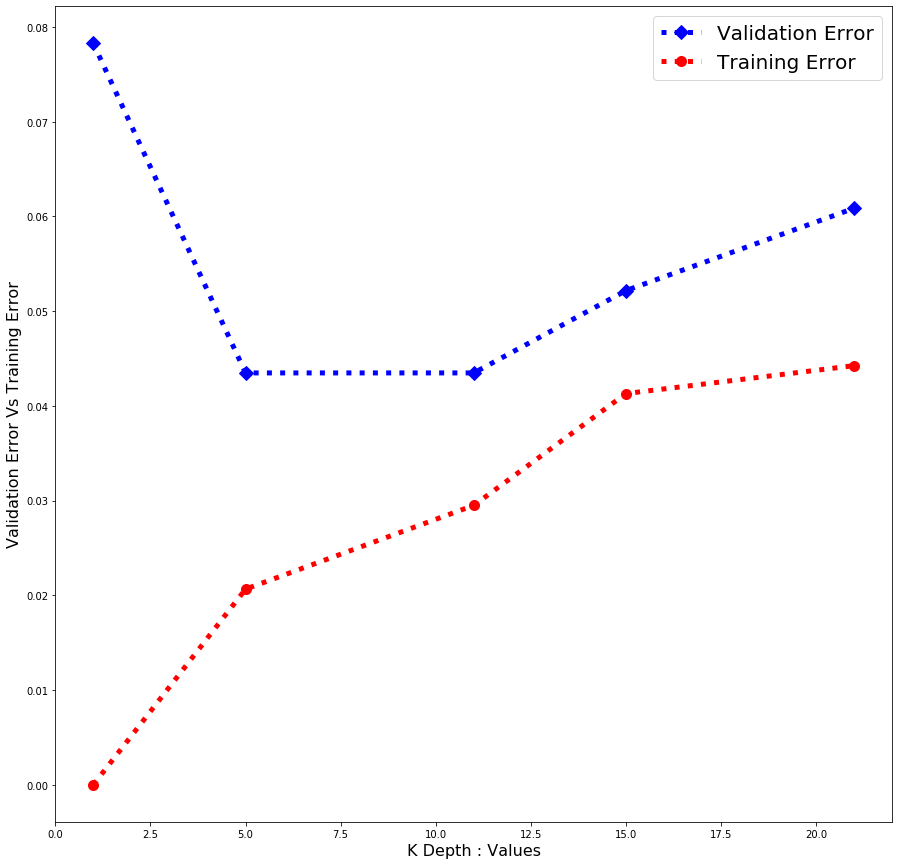

In [72]:
# Insert your code here to perform model selection

##########

from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import accuracy_score

##########

knn_depth = [1,5,11,15,21]
Knn_trn_error = []
Knn_valid_error = []

for ind, key in enumerate(knn_depth):
    knn_model = knc(n_neighbors = key, algorithm = 'kd_tree')
    knn_model.fit(X_trn,Y_trn) 
    pred_y_train = knn_model.predict(X_trn)
    pred_y_valid = knn_model.predict(X_valid)
    
    temp_trn_err = accuracy_score(Y_trn, pred_y_train)
    temp_valid_err = accuracy_score(Y_valid, pred_y_valid)
    Knn_trn_error.append(1 - temp_trn_err)
    Knn_valid_error.append(1 - temp_valid_err)
    
### Visualise ###
    
plt.figure(figsize=(15,15))
plt.plot(knn_depth, Knn_valid_error, marker='D', linestyle='dotted', linewidth=5, markersize=10, color='b')
plt.plot(knn_depth, Knn_trn_error, marker='o', linestyle='dotted', linewidth=5, markersize=10, color='r')

plt.legend(['Validation Error', 'Training Error'], fontsize =20)
plt.ylabel('Validation Error Vs Training Error', fontsize =16)
plt.xlabel('K Depth : Values', fontsize =16)

############# choosing K = 11 : after observation #########

####### Testing Error ####

knn_model_final = knc(n_neighbors=11, algorithm='kd_tree')
knn_model_final.fit(X_trn,Y_trn)
pred_y_test = knn_model_final.predict(X_tst) 
acc_test = accuracy_score(Y_tst, pred_y_test)
print('Testing Accuracy : ', acc_test * 100)

###########

From the graph, we can observe that, choosing k = 11 gives the minimum error and hence we will use K=11 for measuring the testing accuracy of the model. 

**Discussion**: Which of these two approaches, SVMs or kNN, would you prefer for this classification task? Explain.

# Conclusion:

I will prefer KNN over SVM for this breast-cancer dataset because the testing accuracy of KNN is greater than SVM  and KNN is also little faster than SVM to train a model.